In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('test_hackathon_2023.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Compressive strength tests                      232 non-null    object 
 1   Elastic modulus tests                           137 non-null    object 
 2   Flexural strength tests                         60 non-null     object 
 3   Splitting tensile strength tests                116 non-null    object 
 4   Effective water- to-cement ratio                232 non-null    float64
 5   Aggregate-to-cement ratio (a/c)                 210 non-null    float64
 6   RCA replacement ratio (RCA %)                   232 non-null    float64
 7   Parent concrete strength(MPa)                   22 non-null     float64
 8   Nominal maximum RCA size(mm)                    205 non-null    float64
 9   Nominal maximum NA size(mm)                

In [4]:
# making copy of dataset to do changes to dataset without affecting original ddataset
data_copy = data.copy()
# to save to new csv file
data_copy.to_csv('MeanImputedData.csv', index=False)
data_copy=pd.read_csv('MeanImputedData.csv')

In [5]:
data_copy.describe()

,Effective water- to-cement ratio,Aggregate-to-cement ratio (a/c),RCA replacement ratio (RCA %),Parent concrete strength(MPa),Nominal maximum RCA size(mm),Nominal maximum NA size(mm),Bulk density of RCA (kg/m3),Bulk density of NA (kg/m3),Water absorption of RCA(WARCA) (%),Water absorption of NA,Los Angeles abrasion of RCA,Los Angeles abrasion of NA,Density of hardened concrete AD (qad)(kg/m3),Density of hardened concrete SSD (qSSD)(kg/m3),Compressive strength (f’c) (MPa)
count,232.000000,210.000000,232.000000,22.000000,205.000000,205.000000,185.000000,155.000000,173.000000,149.000000,54.000000,43.000000,41.000000,30.000000,232.000000
mean,0.482716,3.163619,54.301724,42.718182,21.560976,22.302439,2418.708108,2682.451613,5.158960,1.155369,36.540741,25.139535,2365.390244,2368.366667,40.159052
std,0.116830,0.940518,38.928110,10.806254,6.053879,5.854966,139.598731,105.381015,1.724429,0.710237,9.302536,4.347037,61.415746,113.168621,15.539161
min,0.240000,1.700000,0.000000,28.250000,7.000000,7.000000,1946.000000,2387.000000,1.500000,0.200000,15.100000,11.900000,2210.000000,2115.000000,13.000000
25%,0.410000,2.600000,20.000000,37.300000,19.000000,20.000000,2330.000000,2600.000000,4.000000,0.600000,30.800000,22.500000,2340.000000,2320.000000,30.175000
50%,0.470000,3.000000,50.000000,38.325000,20.000000,20.000000,2400.000000,2670.000000,5.100000,1.100000,34.000000,24.800000,2365.000000,2360.000000,39.300000
75%,0.540000,3.500000,100.000000,42.425000,25.000000,25.000000,2489.000000,2730.000000,6.100000,1.480000,40.200000,29.100000,2390.000000,2425.000000,46.305000
max,0.840000,6.400000,100.000000,66.000000,32.000000,38.000000,2880.000000,2970.000000,11.900000,3.000000,59.800000,32.000000,2530.000000,2602.000000,102.500000


In [6]:
data_copy

,Compressive strength tests,Elastic modulus tests,Flexural strength tests,Splitting tensile strength tests,Effective water- to-cement ratio,Aggregate-to-cement ratio (a/c),RCA replacement ratio (RCA %),Parent concrete strength(MPa),Nominal maximum RCA size(mm),Nominal maximum NA size(mm),Bulk density of RCA (kg/m3),Bulk density of NA (kg/m3),Water absorption of RCA(WARCA) (%),Water absorption of NA,Los Angeles abrasion of RCA,Los Angeles abrasion of NA,Density of hardened concrete AD (qad)(kg/m3),Density of hardened concrete SSD (qSSD)(kg/m3),Compressive strength (f’c) (MPa)
0,C1,C1,NaN,C1,0.54,3.0,50.0,NaN,19.0,19.0,2320.0,2730.0,5.3,0.5,37.0,23.0,NaN,2400.0,48.90
1,S1,C2,B2,NaN,0.39,2.6,50.0,NaN,20.0,30.0,2400.0,2610.0,4.9,2.5,NaN,NaN,NaN,NaN,61.20
2,C1,C1,B1,NaN,0.34,2.4,100.0,NaN,25.0,38.0,2260.0,NaN,7.5,NaN,NaN,NaN,NaN,NaN,28.40
3,S2,NaN,B1,NaN,0.45,NaN,0.0,38.25,25.0,25.0,2430.0,2650.0,5.2,2.9,34.0,22.0,NaN,NaN,46.24
4,C1,C1,NaN,C1,0.42,2.3,100.0,NaN,19.0,19.0,2320.0,NaN,5.3,NaN,37.0,NaN,NaN,2430.0,65.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,C2,NaN,NaN,NaN,0.50,2.5,25.0,NaN,25.0,32.0,2452.0,2652.0,4.1,0.8,NaN,NaN,2332.0,NaN,52.00
232,S1,C2,B2,NaN,0.39,2.6,0.0,NaN,20.0,30.0,NaN,2610.0,NaN,2.5,NaN,NaN,NaN,NaN,60.30
233,C2,C2,NaN,C2,0.36,2.3,100.0,NaN,16.0,25.0,2780.0,NaN,NaN,NaN,NaN,NaN,2290.0,NaN,60.20
234,C2,C2,NaN,C2,0.70,2.3,100.0,NaN,20.0,19.0,2320.0,NaN,5.3,NaN,42.0,NaN,NaN,NaN,32.00


Data Exploration of Target Varibale (i.e, Compressive strength (f’c) (MPa))

In [7]:
data_copy['Compressive strength (f’c) (MPa)']

0      48.90
1      61.20
2      28.40
3      46.24
4      65.10
       ...  
231    52.00
232    60.30
233    60.20
234    32.00
235    54.90
Name: Compressive strength (f’c) (MPa), Length: 236, dtype: float64

In [8]:
data_copy['Compressive strength (f’c) (MPa)'].describe()

count    232.000000
mean      40.159052
std       15.539161
min       13.000000
25%       30.175000
50%       39.300000
75%       46.305000
max      102.500000
Name: Compressive strength (f’c) (MPa), dtype: float64

In [9]:
# adding a new column as 'ID' to plot the sactter plot
data_copy.insert(0, 'ID', range(len(data_copy)))

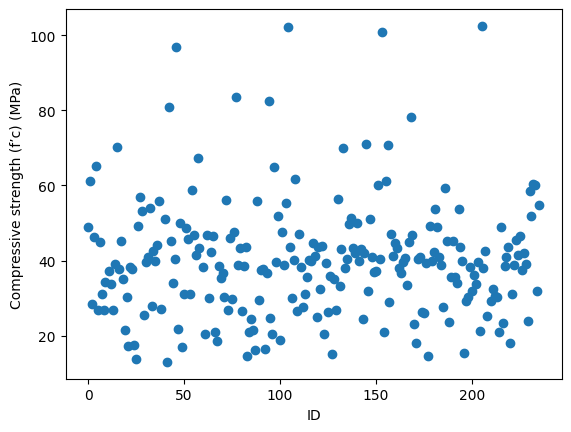

In [11]:
# plotting scatter plot to find outilers
plt.xlabel('ID')
plt.ylabel('Compressive strength (f’c) (MPa)')
plt.scatter(x = data_copy['ID'], y = data_copy['Compressive strength (f’c) (MPa)'])

resolving outliers

<Axes: xlabel='Compressive strength (f’c) (MPa)'>

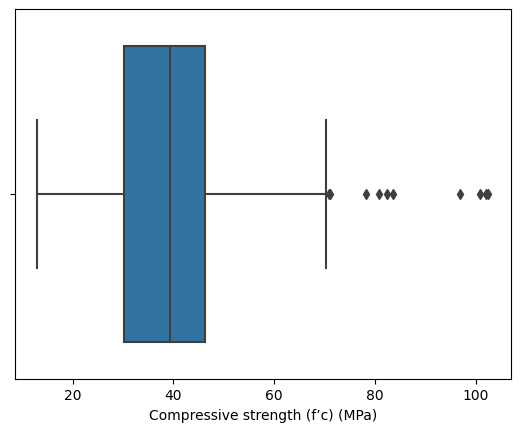

In [12]:
sns.boxplot(x=data_copy['Compressive strength (f’c) (MPa)'])

Removing Outliers in the target variable by imputing with :
    1. lower_limit
    2. upper_limit

In [13]:
q1 = data_copy['Compressive strength (f’c) (MPa)'].quantile(.25)
q3 = data_copy['Compressive strength (f’c) (MPa)'].quantile(.75)
iqr = q3-q1

In [14]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit=min(data['Compressive strength (f’c) (MPa)'])
upper_limit, lower_limit

(70.5, 13.0)

In [15]:
#  limit_imputer will replace the outliers greater then upper_limit with upper_limit
#  and  will replace the outliers lesser then lower_limit with lower_limit
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [16]:
data_copy['Compressive strength (f’c) (MPa)'] = data_copy['Compressive strength (f’c) (MPa)'].apply(limit_imputer)

In [17]:
# target variable after removing outliers
data_copy['Compressive strength (f’c) (MPa)'].describe()

count    232.000000
mean      39.452155
std       13.419956
min       13.000000
25%       30.175000
50%       39.300000
75%       46.305000
max       70.500000
Name: Compressive strength (f’c) (MPa), dtype: float64

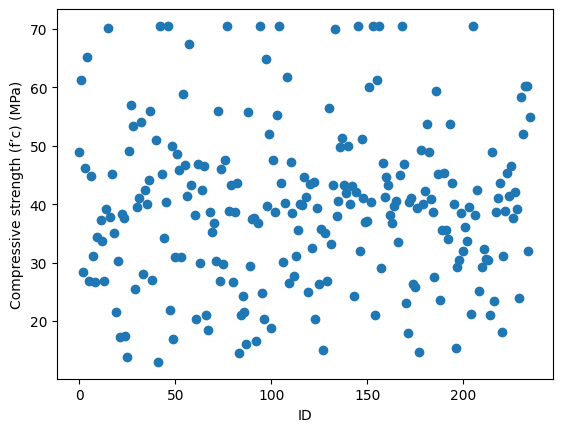

In [19]:
# plotting scatter plot to check if outliers have been removed or not
plt.xlabel('ID')
plt.ylabel('Compressive strength (f’c) (MPa)')
plt.scatter(x = data_copy['ID'], y = data_copy['Compressive strength (f’c) (MPa)'])

<Axes: xlabel='Compressive strength (f’c) (MPa)'>

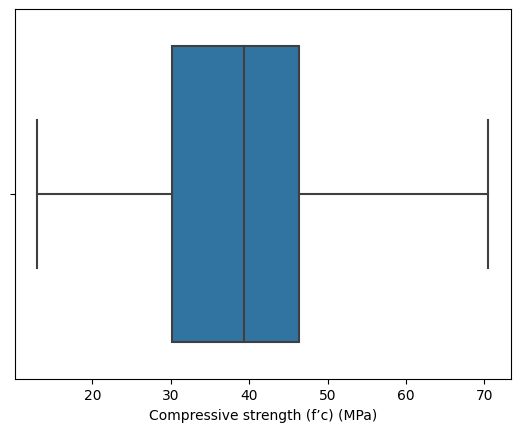

In [20]:
sns.boxplot(x=data_copy['Compressive strength (f’c) (MPa)'])

Deleting the rows for missing values in target variables 
(As imputaition will affect the result so we are avoiding imputaion) 

In [21]:
# dropping the rows in which target variable is not present
data_copy.dropna(inplace=True, axis = 0, subset=['Compressive strength (f’c) (MPa)'])
data_copy.to_csv('MeanImputedData.csv', index=False)
data_copy=pd.read_csv('MeanImputedData.csv')

In [22]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              232 non-null    int64  
 1   Compressive strength tests                      232 non-null    object 
 2   Elastic modulus tests                           137 non-null    object 
 3   Flexural strength tests                         60 non-null     object 
 4   Splitting tensile strength tests                116 non-null    object 
 5   Effective water- to-cement ratio                232 non-null    float64
 6   Aggregate-to-cement ratio (a/c)                 210 non-null    float64
 7   RCA replacement ratio (RCA %)                   232 non-null    float64
 8   Parent concrete strength(MPa)                   22 non-null     float64
 9   Nominal maximum RCA size(mm)               

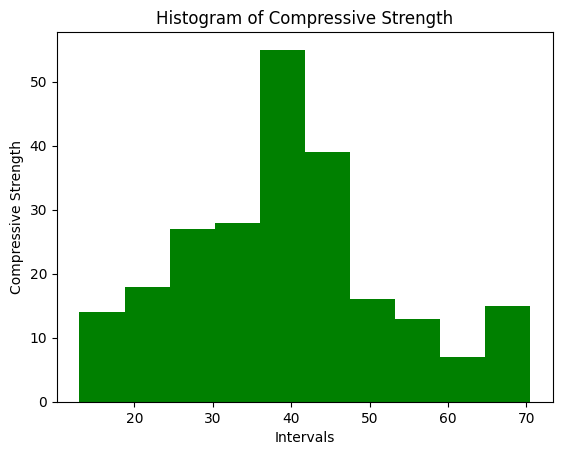

In [23]:
plt.hist(data_copy['Compressive strength (f’c) (MPa)'], bins=10,color='green')
plt.xlabel("Intervals")
plt.ylabel("Compressive Strength")
plt.title("Histogram of Compressive Strength")
plt.show()

# treating independent variables using imputation by mean strategy 
'Effective water- to-cement ratio',
'Aggregate-to-cement ratio (a/c)',
'RCA replacement ratio (RCA %)',
'Aggregate-to-cement ratio (a/c)',
'Parent concrete strength(MPa)',
'Nominal maximum RCA size(mm)',
'Nominal maximum NA size(mm)',
'Water absorption of RCA(WARCA) (%)',
'Water absorption of NA',
'Los Angeles abrasion of RCA',
'Los Angeles abrasion of NA'

Select the imputaion method based on requirements

In [24]:
# listing out the columns that need to be imputed
numerical_column = ['Effective water- to-cement ratio',
                    'Aggregate-to-cement ratio (a/c)',
                    'RCA replacement ratio (RCA %)',
                    'Aggregate-to-cement ratio (a/c)',
                    'Parent concrete strength(MPa)',
                    'Nominal maximum RCA size(mm)',
                    'Nominal maximum NA size(mm)',
                    'Water absorption of RCA(WARCA) (%)',
                    'Water absorption of NA',
                    'Los Angeles abrasion of RCA',
                    'Los Angeles abrasion of NA'
                   ]

In [25]:
data_copy.isnull().sum()

ID                                                  0
Compressive strength tests                          0
Elastic modulus tests                              95
Flexural strength tests                           172
Splitting tensile strength tests                  116
Effective water- to-cement ratio                    0
Aggregate-to-cement ratio (a/c)                    22
RCA replacement ratio (RCA %)                       0
Parent concrete strength(MPa)                     210
Nominal maximum RCA size(mm)                       27
Nominal maximum NA size(mm)                        27
Bulk density of RCA (kg/m3)                        47
Bulk density of NA (kg/m3)                         77
Water absorption of RCA(WARCA) (%)                 59
Water absorption of NA                             83
Los Angeles abrasion of RCA                       178
Los Angeles abrasion of NA                        189
Density of hardened concrete AD (qad)(kg/m3)      191
Density of hardened concrete

In [26]:
# 1. Mean-(mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data_copy[numerical_column] = imputer.fit_transform(data_copy[numerical_column])
data_copy.to_csv('MeanImputedData.csv', index=False)
data_copy=pd.read_csv('MeanImputedData.csv')

In [27]:
data_copy.isnull().sum()

ID                                                  0
Compressive strength tests                          0
Elastic modulus tests                              95
Flexural strength tests                           172
Splitting tensile strength tests                  116
Effective water- to-cement ratio                    0
Aggregate-to-cement ratio (a/c)                     0
RCA replacement ratio (RCA %)                       0
Parent concrete strength(MPa)                       0
Nominal maximum RCA size(mm)                        0
Nominal maximum NA size(mm)                         0
Bulk density of RCA (kg/m3)                        47
Bulk density of NA (kg/m3)                         77
Water absorption of RCA(WARCA) (%)                  0
Water absorption of NA                              0
Los Angeles abrasion of RCA                         0
Los Angeles abrasion of NA                          0
Density of hardened concrete AD (qad)(kg/m3)      191
Density of hardened concrete

In [28]:
# List the columns to drop
columns_to_drop = ['ID','Compressive strength tests',
                     'Elastic modulus tests',
                     'Flexural strength tests',
                     'Splitting tensile strength tests',
                     'Bulk density of RCA (kg/m3)',
                     'Density of hardened concrete AD (qad)(kg/m3)',
                     'Density of hardened concrete SSD (qSSD)(kg/m3)'
                    ]

# Drop the specified columns
data_copy.drop(columns=columns_to_drop, inplace=True)


In [29]:
#  checking the correlation between the columns
correlation = data_copy.corr()
correlation

,Effective water- to-cement ratio,Aggregate-to-cement ratio (a/c),RCA replacement ratio (RCA %),Parent concrete strength(MPa),Nominal maximum RCA size(mm),Nominal maximum NA size(mm),Bulk density of NA (kg/m3),Water absorption of RCA(WARCA) (%),Water absorption of NA,Los Angeles abrasion of RCA,Los Angeles abrasion of NA,Compressive strength (f’c) (MPa)
Effective water- to-cement ratio,1.000000,0.372228,0.109377,-0.123318,0.099875,-0.021099,-0.092653,0.090563,-0.017161,0.076436,0.060142,-0.434710
Aggregate-to-cement ratio (a/c),0.372228,1.000000,0.143132,-0.111075,0.127758,-0.096966,0.208134,0.120878,0.048807,0.015864,-0.069039,-0.435277
RCA replacement ratio (RCA %),0.109377,0.143132,1.000000,-0.009212,0.100310,0.029510,0.059925,-0.015923,0.059633,-0.043158,0.045339,-0.252192
Parent concrete strength(MPa),-0.123318,-0.111075,-0.009212,1.000000,-0.146223,-0.185544,0.063548,-0.110781,-0.133293,-0.071496,0.102116,0.158091
Nominal maximum RCA size(mm),0.099875,0.127758,0.100310,-0.146223,1.000000,0.470792,0.161239,-0.130241,-0.313837,0.150546,0.091229,-0.299639
Nominal maximum NA size(mm),-0.021099,-0.096966,0.029510,-0.185544,0.470792,1.000000,-0.117729,0.015322,-0.031180,0.086188,-0.076579,-0.196648
Bulk density of NA (kg/m3),-0.092653,0.208134,0.059925,0.063548,0.161239,-0.117729,1.000000,0.259819,-0.285265,-0.120200,-0.214552,-0.167671
Water absorption of RCA(WARCA) (%),0.090563,0.120878,-0.015923,-0.110781,-0.130241,0.015322,0.259819,1.000000,0.025035,0.049004,-0.096890,-0.095212
Water absorption of NA,-0.017161,0.048807,0.059633,-0.133293,-0.313837,-0.031180,-0.285265,0.025035,1.000000,-0.076792,-0.122085,0.049172
Los Angeles abrasion of RCA,0.076436,0.015864,-0.043158,-0.071496,0.150546,0.086188,-0.120200,0.049004,-0.076792,1.000000,0.169187,-0.081692


<Axes: >

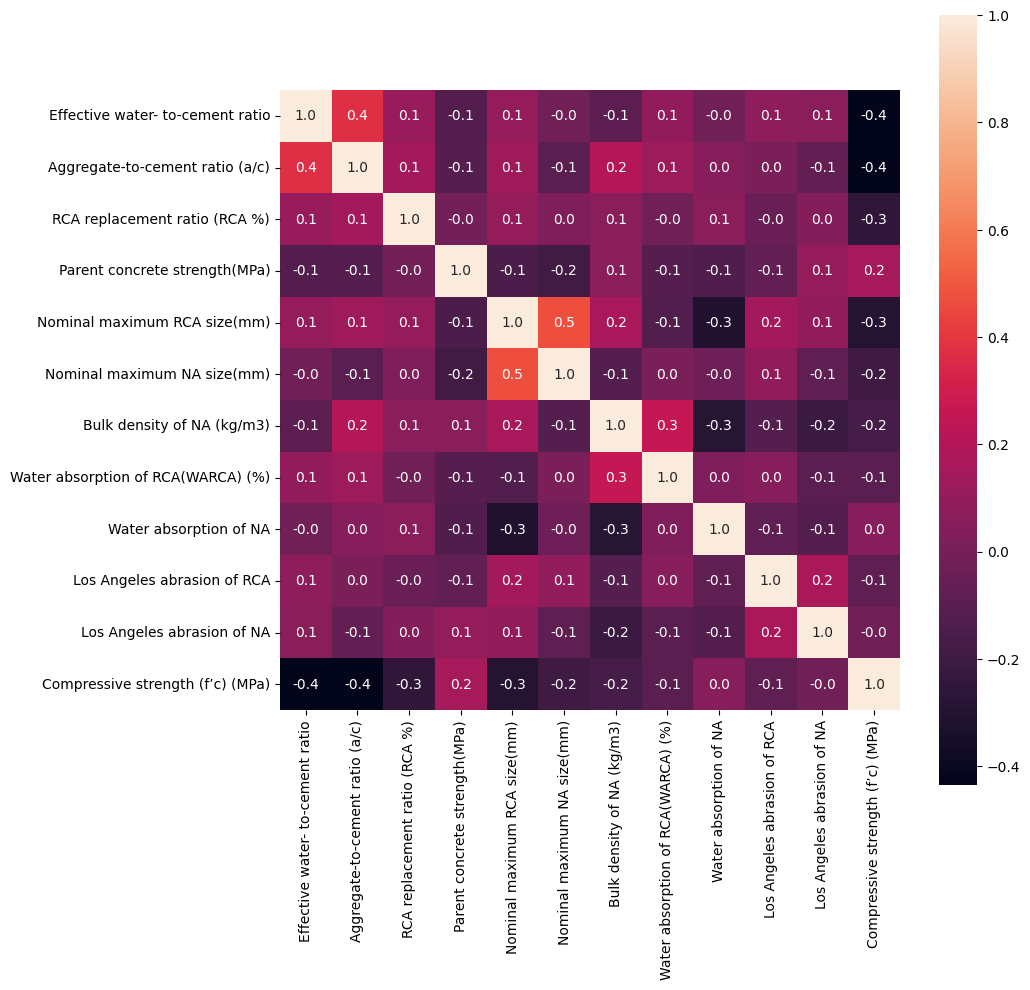

In [30]:
#  visualizing the correlation between the columns using heat-map 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f',annot=True, annot_kws={'size':10})

In [31]:
data_copy

,Effective water- to-cement ratio,Aggregate-to-cement ratio (a/c),RCA replacement ratio (RCA %),Parent concrete strength(MPa),Nominal maximum RCA size(mm),Nominal maximum NA size(mm),Bulk density of NA (kg/m3),Water absorption of RCA(WARCA) (%),Water absorption of NA,Los Angeles abrasion of RCA,Los Angeles abrasion of NA,Compressive strength (f’c) (MPa)
0,0.54,3.000000,50.0,42.718182,19.0,19.0,2730.0,5.30000,0.500000,37.000000,23.000000,48.90
1,0.39,2.600000,50.0,42.718182,20.0,30.0,2610.0,4.90000,2.500000,36.540741,25.139535,61.20
2,0.34,2.400000,100.0,42.718182,25.0,38.0,NaN,7.50000,1.155369,36.540741,25.139535,28.40
3,0.45,3.163619,0.0,38.250000,25.0,25.0,2650.0,5.20000,2.900000,34.000000,22.000000,46.24
4,0.42,2.300000,100.0,42.718182,19.0,19.0,NaN,5.30000,1.155369,37.000000,25.139535,65.10
...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.50,2.500000,25.0,42.718182,25.0,32.0,2652.0,4.10000,0.800000,36.540741,25.139535,52.00
228,0.39,2.600000,0.0,42.718182,20.0,30.0,2610.0,5.15896,2.500000,36.540741,25.139535,60.30
229,0.36,2.300000,100.0,42.718182,16.0,25.0,NaN,5.15896,1.155369,36.540741,25.139535,60.20
230,0.70,2.300000,100.0,42.718182,20.0,19.0,NaN,5.30000,1.155369,42.000000,25.139535,32.00


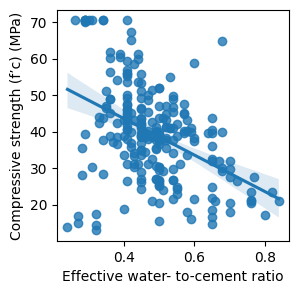

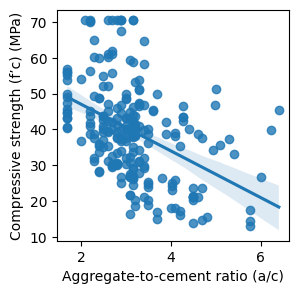

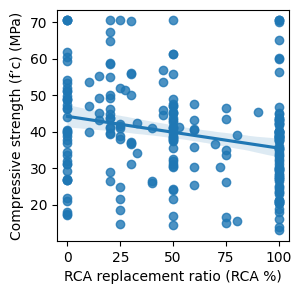

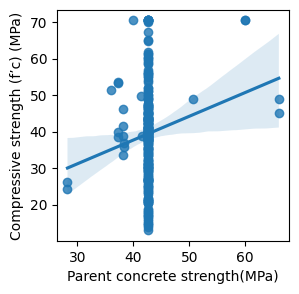

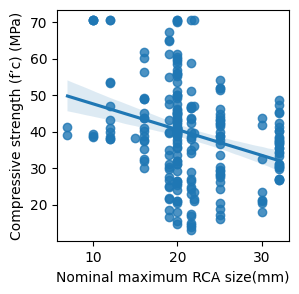

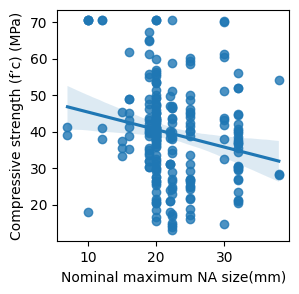

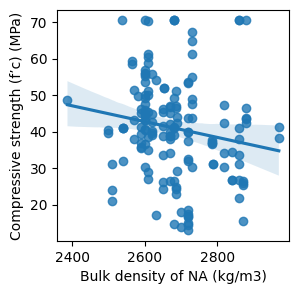

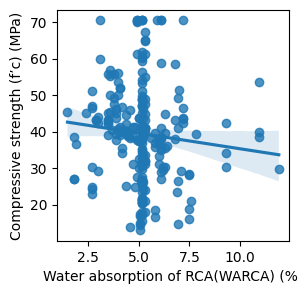

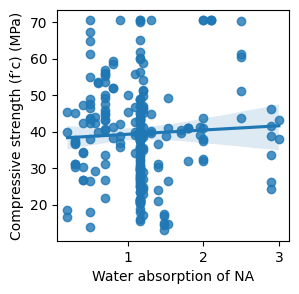

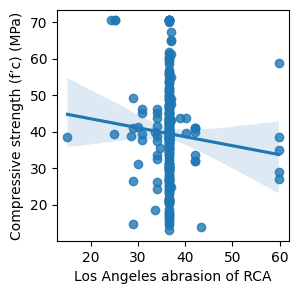

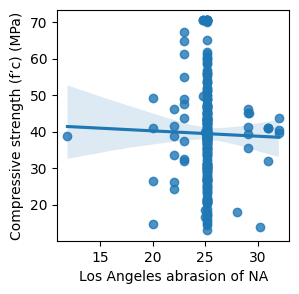

In [32]:
# Assuming 'y' is the column name for the target variable and the remaining columns are independent variables
target_variable = 'Compressive strength (f’c) (MPa)'
independent_variables = data_copy.columns.drop(target_variable)

# Plotting the regression graphs for each independent variable

for independent_variable in independent_variables:
    plt.figure(figsize=(3, 3))
    sns.regplot(x=independent_variable, y=target_variable, data=data_copy)
    plt.xlabel(independent_variable)
    plt.ylabel(target_variable)
    plt.show()


# Model Training and Evaluation

In [33]:
# from sklearn.datasets import make_classification
# from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
X=data_copy.iloc[:,:-1].values
y=data_copy.iloc[:,-1].values

In [35]:
# Split 80% of the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining 20% of the dataset into validation set and testing set
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


data_copy = data_copy.drop(['Compressive strength tests',
                     'Elastic modulus tests',
                     'Flexural strength tests',
                     'Splitting tensile strength tests',
                     'Bulk density of RCA (kg/m3)',
                     'Bulk density of NA (kg/m3)',
                     'Density of hardened concrete AD (qad)(kg/m3)',
                     'Density of hardened concrete SSD (qSSD)(kg/m3)',],axis=1)
data_copy.to_csv('MeanImputedData.csv', index=False)
data_copy=pd.read_csv('MeanImputedData.csv')

In [36]:
#  dropping the columns that is not much relavent in prediction of target variable 
try:
    # Load dataset
    data_copy = pd.read_csv('MeanImputedData.csv')
    # Drop columns
    data_copy = data_copy.drop(['ID','Compressive strength tests',
                         'Elastic modulus tests',
                         'Flexural strength tests',
                         'Splitting tensile strength tests',
                         'Bulk density of RCA (kg/m3)',
                         'Bulk density of NA (kg/m3)',
                         'Density of hardened concrete AD (qad)(kg/m3)',
                         'Density of hardened concrete SSD (qSSD)(kg/m3)'], axis=1)

    # Save to file
    data_copy.to_csv('MeanImputedData.csv', index=False)
except Exception as e:
    print('Error:', e)
data_copy = pd.read_csv('MeanImputedData.csv')

data["Compressive strength (f’c) (MPa)"] = np.round(["Compressive strength (f’c) (MPa)"])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data_copy.drop(columns=["Compressive strength (f’c) (MPa)"]), data_copy["Compressive strength (f’c) (MPa)"], test_size=0.2, random_state=42)

In [38]:
# Multiple Linear Regression:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
y_pred = mlr.predict(X_test)
mlr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % mlr_mse)
print("Score : ",mlr_score)

Mean Squared Error: 111.64
Score :  0.24369595103796715


In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
decision_score = tr_regressor.score(X_test,y_test)
y_pred = tr_regressor.predict(X_test)
tr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % tr_mse)
print("Score : ",decision_score)

Mean Squared Error: 132.61
Score :  0.10163528858518911


In [40]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(n_estimators=28,random_state=0)
RFModel.fit(X_train,y_train)
RF_score = RFModel.score(X_test,y_test)
RF_pred =RFModel.predict(X_test)
RF_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % RF_mse)
print("Score : ",RF_score)


Mean Squared Error: 132.61
Score :  0.5393021553791466


In [41]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

gbmModel = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gbmModel.fit(X_train, y_train)
y_pred = gbmModel.predict(X_test)
gbm_score = gbmModel.score(X_test, y_test)
GBMmse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % GBMmse)
print("Score : %.2f" % gbm_score)

Mean Squared Error: 74.45
Score : 0.50


In [42]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

base_model = DecisionTreeRegressor(max_depth=3)
Ada_model = AdaBoostRegressor(estimator=base_model, n_estimators=100, learning_rate=0.1, random_state=42)
Ada_model.fit(X_train, y_train)
y_pred = Ada_model.predict(X_test)
Ada_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f"% Ada_mse)
Ada_score = Ada_model.score(X_test, y_test)
print("Score : ",Ada_score)

Mean Squared Error: 76.58
Score :  0.4812255093140996


In [43]:
# XGBoost Regressorxgb_model
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:%.2f"% xgb_mse)
xgb_score = xgb_model.score(X_test, y_test)
print("Score : ",xgb_score)

Mean Squared Error:67.36
Score :  0.5436879380510502


In [44]:
import pickle

In [50]:
pickle.dump(xgb_model, open('XGB_model.pkl','wb'))

I am using XGBoost Regression as it gives least error and more accurate result
Mean Squared Error: 67.36
Score :  0.5436879380510502